In [72]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import string
import random

In [17]:
# data reader
csv_files = glob.glob("landmarks/*/*.csv")

X = []
Y = []

for csv_file in csv_files:
    print(f"reading {csv_file}")
    df = pd.read_csv(csv_file)
    X.append(df.values)
    Y.append(Path(csv_file).parent.name)

X = np.array(X)
Y = np.array(Y)

reading landmarks\A\A (1).csv
reading landmarks\A\A (10).csv
reading landmarks\A\A (11).csv
reading landmarks\A\A (12).csv
reading landmarks\A\A (13).csv
reading landmarks\A\A (14).csv
reading landmarks\A\A (15).csv
reading landmarks\A\A (16).csv
reading landmarks\A\A (17).csv
reading landmarks\A\A (3).csv
reading landmarks\A\A (4).csv
reading landmarks\A\A (5).csv
reading landmarks\A\A_1.csv
reading landmarks\A\A_2.csv
reading landmarks\A\A_3.csv
reading landmarks\A\A_4.csv
reading landmarks\A\A_5.csv
reading landmarks\A\A_6.csv
reading landmarks\B\B (1).csv
reading landmarks\B\B (10).csv
reading landmarks\B\B (11).csv
reading landmarks\B\B (12).csv
reading landmarks\B\B (13).csv
reading landmarks\B\B (14).csv
reading landmarks\B\B (15).csv
reading landmarks\B\B (3).csv
reading landmarks\B\B (4).csv
reading landmarks\B\B (5).csv
reading landmarks\B\B (8).csv
reading landmarks\B\B (9).csv
reading landmarks\B\B_1.csv
reading landmarks\B\B_2.csv
reading landmarks\B\B_3.csv
reading landma

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)


In [30]:
# check array Y has all classes
all((c in y_train for c in string.ascii_uppercase))

True

In [31]:
# Encode the target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Convert labels to one-hot encoding
num_classes = 26
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
X_train.shape

(365, 21, 3)

### Model


Epoch 1/100
12/12 [==============================] - 1s 24ms/step - loss: 3.2781 - accuracy: 0.0137 - val_loss: 3.2506 - val_accuracy: 0.0217
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 3.2376 - accuracy: 0.0438 - val_loss: 3.2222 - val_accuracy: 0.0652
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 3.2091 - accuracy: 0.0959 - val_loss: 3.1968 - val_accuracy: 0.0870
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 3.1788 - accuracy: 0.1397 - val_loss: 3.1694 - val_accuracy: 0.0761
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 3.1520 - accuracy: 0.1562 - val_loss: 3.1395 - val_accuracy: 0.1957
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 3.1183 - accuracy: 0.2110 - val_loss: 3.1098 - val_accuracy: 0.1848
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 3.0839 - accuracy: 0.2055 - val_loss: 3.0684 - val_accuracy: 0.2609
Epoch 8/100


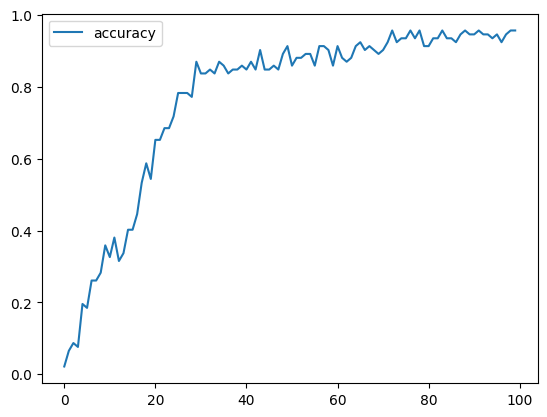

In [57]:
# Define the fully connected neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(21, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[callback])

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")


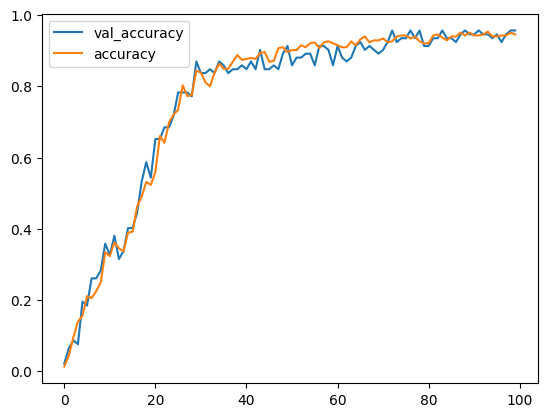

In [60]:
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

In [58]:
model.save("model.keras")

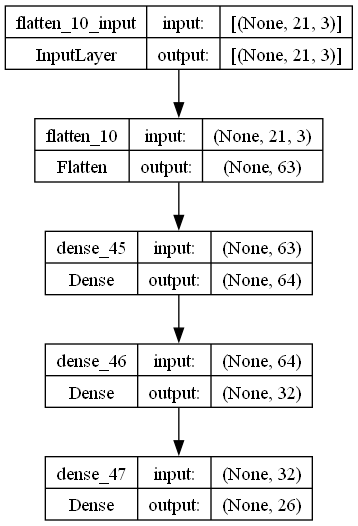

In [59]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

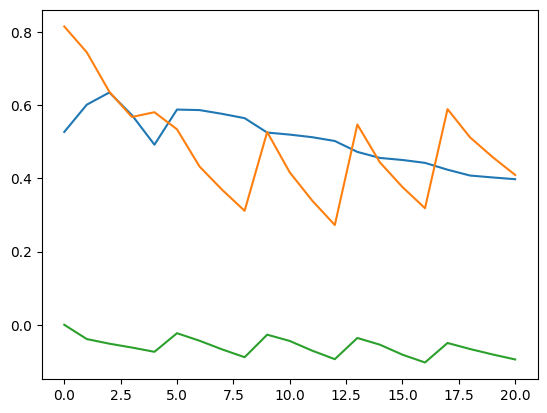

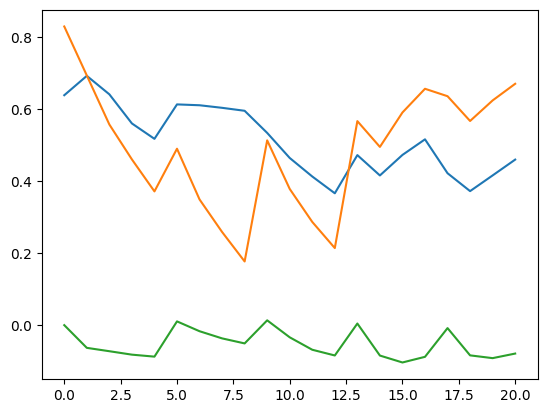

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.88,
        0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.03, 0.02,
        0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [82]:
pred = random.choice(X_test)
plt.plot(pred)
plt.show()

res = model(np.array([pred]))
res.numpy().round(2)

In [92]:
np.where(res.numpy() > 0.01)

(array([0, 0, 0, 0, 0], dtype=int64), array([10, 11, 17, 20, 21], dtype=int64))